In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import json
import os

In [2]:
with open('config.json', 'r') as file:
    CONFIG = json.load(file)

In [3]:
folder_path = CONFIG['study_area']['data_root']
data_root = os.path.join(folder_path, CONFIG['output_folder_name'])
point_grid_path = os.path.join(data_root, 'intermediate', 'point_grid.dat')
index_map_path = os.path.join(data_root,  'index_map.dat')
shadow_map_path = os.path.join(data_root, 'shadow_map.dat')

azimuth_map_path = os.path.join(data_root,  'azimuth_map.dat')
elevation_map_path = os.path.join(data_root, 'elevation_map.dat')

horizon_factor_path = os.path.join(data_root, 'horizon_factor_map.dat')
sky_view_factor_path = os.path.join(data_root,  'sky_view_factor_map.dat')

voxel_size = CONFIG['voxel_resolution']
num_azimuth = 360//CONFIG['azimuth_resolution']
num_elevation = 90//CONFIG['elevation_resolution']
print(num_azimuth, num_elevation)
num_samples = num_azimuth*num_elevation
index_dim = (num_elevation,num_azimuth)

180 45


In [4]:
point_grid = np.loadtxt(point_grid_path)
horizon_factor_path = np.memmap(horizon_factor_path, dtype=np.float16, mode='r')
sky_view_factor_path = np.memmap(sky_view_factor_path, dtype=np.int32, mode='r')

index_map = np.memmap(index_map_path, dtype=np.uint32, mode='r')
azimuth_map = np.memmap(azimuth_map_path, dtype=np.float16, mode='r')
elevation_map = np.memmap(elevation_map_path, dtype=np.float16, mode='r')

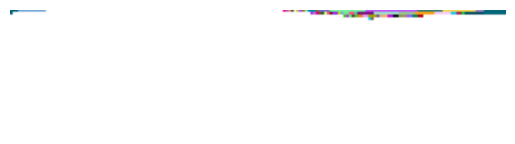

sky view factor:  0.975679012345679
horizon factor:  1.87
point info:  ['214483.00000', '494246.00000', '3.10328', '-0.00090', '0.09990', '0.99500', '3.00000']


In [35]:
point_idx = 646299

index_start = point_idx*num_samples
index_end = (point_idx+1)*num_samples

voxel_indices = index_map[index_start:index_end]
voxel_indices = voxel_indices.reshape(index_dim)
unique_values = np.unique(voxel_indices)

# 创建一个随机颜色映射，确保白色为最大值对应的颜色
colors = {}
for value in unique_values:
    # print(value)
    if value == 4294967295:
        colors[value] = (1.0, 1.0, 1.0)  # 白色
    else:
        colors[value] = (random.random(), random.random(), random.random())

# 将图像数据转换为 RGB
image = np.zeros((voxel_indices.shape[0], voxel_indices.shape[1], 3))

for i in range(voxel_indices.shape[0]):
    for j in range(voxel_indices.shape[1]):
        image[i, j] = colors[voxel_indices[i, j]]

image = np.flipud(image)
plt.imshow(image)
plt.axis('off')  # 隐藏坐标轴
plt.show()

print("sky view factor: ", sky_view_factor_path[point_idx]/num_samples)
print("horizon factor: ", horizon_factor_path[point_idx])
formatted_values = [f"{x:.5f}" for x in point_grid[point_idx]]
print("point info: ", formatted_values)
